In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow import keras

In [ ]:
path = '/assets'


from tensorflow.keras.models import load_model
model = load_model(path + 'FashionNet_Optimized.keras')

In [30]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape if the model expects channel dimension
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)


In [33]:
test_pred = model.predict(x_test)
test_pred = np.argmax(test_pred, axis=1)
test_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 3, 1, 5])

In [34]:
accuracy_score(y_test, test_pred)

0.4679

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred)

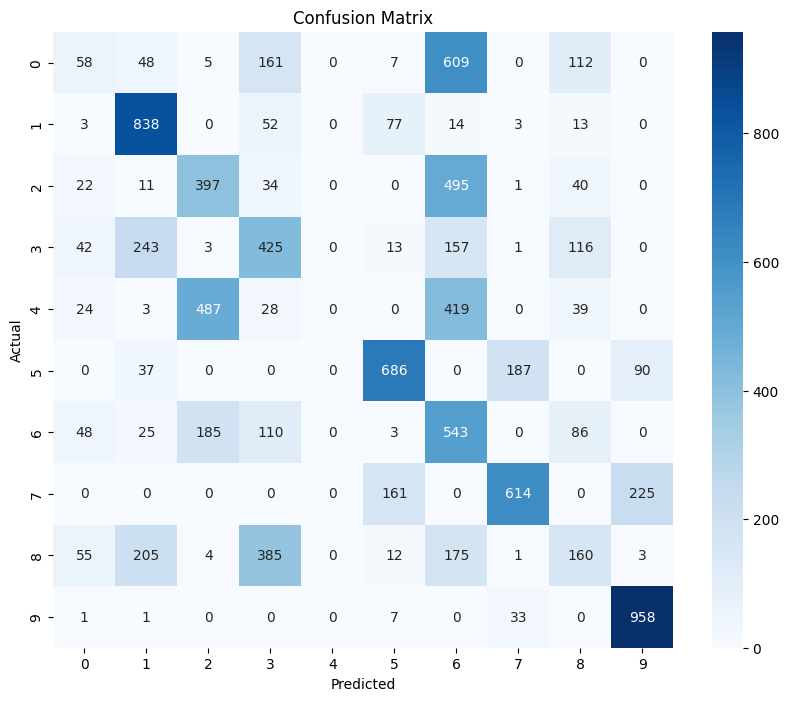

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, test_pred)}')
print(f'Recall: {recall_score(y_test, test_pred, average="macro")}')
print(f'Precision: {precision_score(y_test, test_pred, average="macro")}')
print(f'F1 Score: {f1_score(y_test, test_pred, average="macro")}')

Accuracy: 0.4679
Recall: 0.46790000000000004
Precision: 0.424574602128075
F1 Score: 0.42862295460104727


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Reflection: How did the vector representation evolve? ###

**Step 1: Flatten(input_shape=(28, 28))**

	•	Input: 28×28 image → a 2D array

	•	Flattening: Converts this into a 1D vector of 784 elements (28×28 = 784).

	•	Now, each image is a 784-dimensional vector. These are raw pixel values scaled (usually between 0 and 1).

**Step 2: Dense(3, activation=activation)**

	•	First Dense Layer (Hidden Layer) with only 3 neurons.

	•	Each of the 3 neurons learns a different weighted combination of the 784 input features.

	•	The output of this layer is a 3-dimensional vector representing an abstract transformation of the image.

	•	This 3D vector is passed through an activation function (ReLU in your case).

At this point, the model has learned to project high-dimensional raw image data into a very compact 3D feature space. This is a massive compression.



**Activation Function (ReLU)**

	•	Introduces non-linearity.
	•	Allows the model to capture complex patterns.
	•	ReLU outputs max(0, x) — meaning only positive signals are allowed to pass.



**Step 3: Dense(10, activation='softmax')**

 	•	This is the output layer, producing a 10-dimensional probability vector, each value indicating the likelihood of the input belonging to one of the 10 Fashion-MNIST classes.


Source: ChatGPT for formatting and detailed explanation

